In [176]:
#Install the necessary modules for the Jupyter notebook 

%pip install pandas scikit-learn matplotlib scipy 


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [178]:
#Import the desired packages from the modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#Use Pandas to import the Valuer-General's data and assign it to a variable called df
df = pd.read_excel("./data/Suburb_HouseV3022z.xlsx", skiprows=[0, 2, 3, 4], header=0)

#Use Pandas to rename colums for readability
df = df.rename(
    columns={
        "Unnamed: 0": "locality",
        "change": "change_2021-2022",
        "change.1": "change_2012-2022",
    }
)

#Use the .head function to return the first 5 rows of the dataset
df.head()

,locality,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,prelim 2023
0,ABBOTSFORD,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1365000,1341500,1409000.0
1,ABERFELDIE,852500,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1858000,1860000,NaN
2,AINTREE,-,-,-,600000,600000,571000,557500,575000,630000,719000,760000,710000.0
3,AIREYS INLET,634000,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1725000,1570000.0
4,AIRPORT WEST,495000,532000,575000,635000,742000,845000,845000,795000,812500,965000,926500,795000.0


In [179]:
#Drop the prelim 2023 column and the localilty column. Locality is dropped as it includes categorical values that prevent the model from calculating
df = df.drop(["locality", 'prelim 2023'], axis=1)

#View the data to confirm columns are removed
df.head()


,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1365000,1341500
1,852500,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1858000,1860000
2,-,-,-,600000,600000,571000,557500,575000,630000,719000,760000
3,634000,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1725000
4,495000,532000,575000,635000,742000,845000,845000,795000,812500,965000,926500


In [182]:
#Print the shape (count of columsn and rows) of teh dataset
print(df.shape)

#Confirm the the rows are numeric values (class 'int')
print(type(df.shape[0]))
print(type(df.shape[1]))

(826, 11)
<class 'int'>
<class 'int'>


In [181]:
#Print first 5 and last 5 rows of the dataset and include a count of the rows and columns

df[:]

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1365000,1341500
1,852500,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1858000,1860000
2,-,-,-,600000,600000,571000,557500,575000,630000,719000,760000
3,634000,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1725000
4,495000,532000,575000,635000,742000,845000,845000,795000,812500,965000,926500
...,...,...,...,...,...,...,...,...,...,...,...
821,215000,190000,202500,245000,230000,225000,218000,240000,260000,360000,462500
822,613000,696000,710000,810000,900500,1000000,1045000,971000,1033000,1195000,1205000
823,300000,302500,297000,300500,320000,324500,345000,375000,456500,565000,665000
824,255000,260000,255000,260000,305000,385000,390000,435500,422500,570000,617500


In [188]:
#Ensure that there are no non-numeric values in the dataset, and coerce any that are to numeric. Any NaN's are converted to int 0

df = df.apply(pd.to_numeric, errors='coerce')
df = df.fillna(0)

#Assign columns 2012-2021 to the variable X and 2022 to the variable Y 
X = df.drop(columns=2022, axis=1)
Y = df[2022]

#Split the dataset into a train/test split. We will be training on the data in the variable X and testing against variable Y. 
X_train, X_test, y_train, y_test = train_test_split(X, Y)


In [185]:
#Assign the linear regression model to a variable called model
model = linear_model.LinearRegression()

#Fit the dataset to the linear regression model
model.fit(X_train, y_train)

LinearRegression()

In [194]:
#Assign the values of the predict function used with the test data to a variable called pred
pred = model.predict(X_test)

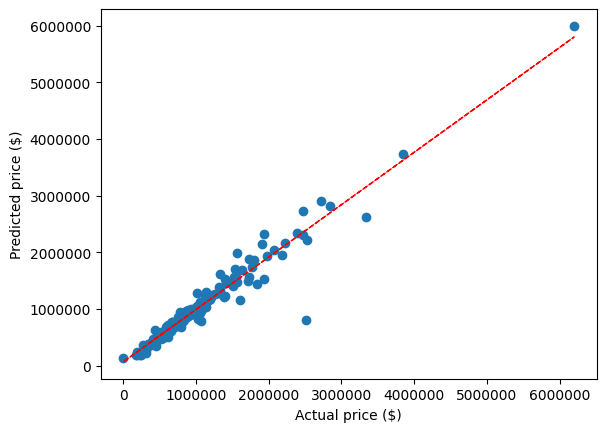

In [174]:
#Import the necessary modules to plot the data and calculate the linear regression of the dataset
import matplotlib.pyplot as plt
import numpy as np

#Scatter the data
plt.scatter(y_test, pred)

#Calculate equation for the trendline
z = np.polyfit(y_test, pred, 1)
p = np.poly1d(z)

#Add trendline to plot
plt.plot(y_test, p(y_test), color="red", linewidth=1, linestyle="--")

#Add labels
plt.xlabel('Actual price ($)')
plt.ylabel('Predicted price ($)')

#Prevent scientific notation 
plt.ticklabel_format(style='plain')

#Show the plot
plt.show()

In [175]:
#We can see one major outlier, print the max value of the pred variable and confirm the it matches visual inspection of the plot 
print(pred.max())

5994368.376220858


In [196]:
#Import module to calulate the coefficient of correlation
from scipy import stats

#The coefficient of correlation is called r.
#The r value ranges from -1 to 1, where 0 means no relationship, and 1 (and -1) means 100% related.

#Calculate the coefficient of correlation
slope, intercept, r, p, std_err = stats.linregress(y_test, pred)

#Print the coefficient of correlation, at .97 we have a highly related dataset. 
print(r)

0.978419271562669
